## How many male and female per zipcode ?

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

%matplotlib inline

In [30]:
df = pd.read_csv('../data/Nyc_Gender_data_by_zipcodes_female.csv', skiprows=1)

In [31]:
df.head()

,Geography,Total; Estimate; Total population,Male; Estimate; Total population,Female; Estimate; Total population
0,ZCTA5 00601,17599,8809,8790
1,ZCTA5 00602,39209,19231,19978
2,ZCTA5 00603,50135,24497,25638
3,ZCTA5 00606,6304,3148,3156
4,ZCTA5 00610,27590,13332,14258


In [32]:
df.columns

Index(['Geography', 'Total; Estimate; Total population',
       'Male; Estimate; Total population',
       'Female; Estimate; Total population'],
      dtype='object')

In [36]:
df = df.rename(columns ={'Male; Estimate; Total population': 'male',
                         'Female; Estimate; Total population': 'female',
                         'Total; Estimate; Total population': 'totalGender'})

In [37]:
df['zip'] = df.Geography.str[-6:]

In [38]:
df['male'] = pd.to_numeric(df.male)
df['female'] = pd.to_numeric(df.female)
df['totalGender'] = pd.to_numeric(df.totalGender)

In [43]:
#SUBSET:
df_mostPopulated_top10 = df.sort_values(by='totalGender', ascending=False)[:10]
df_mostPopulated_top10

,Geography,totalGender,male,female,zip
26837,ZCTA5 77449,119204,57170,62034,77449
2877,ZCTA5 11368,114647,60490,54157,11368
20721,ZCTA5 60629,114129,55932,58197,60629
27790,ZCTA5 79936,111918,55178,56740,79936
30019,ZCTA5 90011,108051,53897,54154,90011
2888,ZCTA5 11385,106598,52837,53761,11385
30142,ZCTA5 90650,106404,52830,53574,90650
26874,ZCTA5 77494,105854,52184,53670,77494
30225,ZCTA5 91331,105696,52882,52814,91331
26735,ZCTA5 77084,104582,52676,51906,77084


### Plotting Male & Female counts in NYC areas, where the top 10 busiest stations are located

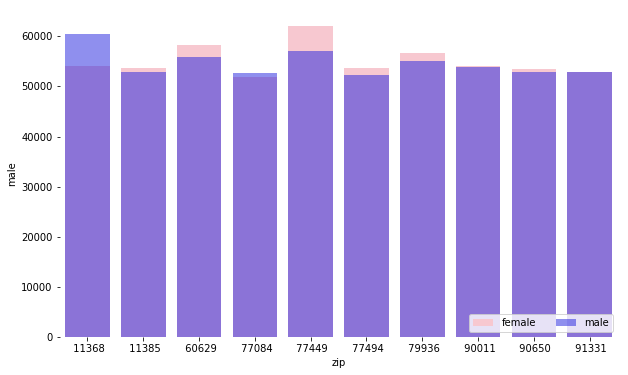

In [52]:

f, ax = plt.subplots(figsize=(10, 6))
sns.set_color_codes("pastel")
sns.barplot(x='zip', y='female', data=df_mostPopulated_top10, label='female', color='pink')

sns.set_color_codes("muted")
sns.barplot(x='zip', y='male', data=df_mostPopulated_top10, label='male', color='blue', alpha=0.5)

ax.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)


**Observation:**
- There is a comparable number of male and female in select zipcodes, where top 10 busiest stations are located 
